# Problem 1: Small World Problem (SWP)

- How far apart are two random individuals?
    - Important for studying how things "spread" or analyze "networks"
- Want to test if the SWP holds for a system of interactions
    - Test/study this through mathematical models/algos


## A model
- Using a graph that is not directional
    - Graph of connected nodes
- Characterized by small path lengths
- Goal is to compute the distribution and basic statistical properties of pairwise shortest path lengths
- SWP takes:
    - Inputs: a graph G(V,E)
    - __Outputs: distributed distanecs d_uv between all pairs of nodes u,v in G__
        - This allows alot of different kind of analyses
- Shorter or less steps/paths = More connected groups

## A Naive Distance Algorithm (Brute Force Algorithm)
- SWP needs algo to find the distance between two nodes
- Given two nodes, u and v:
    - Check if there is a path u = u_0, u_1, ..., u_k = v of length k for increasing values of k starting at k=1
    - How far apart is u from v? (this implements the definition of distance)
    - Check every vertices to see how far you are away and then find the best one



In [2]:
from itertools import permutations, combinations

def brute_force_shortest_path(graph, u, v):
    """
    Finds the shortest path between vertices u and v in an undirected graph using brute force.
    
    :param graph: A dictionary representing an undirected graph where keys are vertices and values are lists of adjacent vertices.
    :param u: The start vertex.
    :param v: The end vertex.
    :return: The length of the shortest path from u to v, or float('inf') if no path exists.
    """
    # Get all vertices in the graph
    vertices = list(graph.keys())
    n = len(vertices)
    
    # Check if start or end vertices are not in the graph
    if u not in graph or v not in graph:
        return float('inf')
    
    # Start with path length k = 1
    k = 1
    
    # Loop until k reaches the number of vertices
    while k < n:
        # Iterate over all subsets of V - {u, v} of size k-1
        for U in combinations(set(vertices) - {u, v}, k-1):
            # Iterate over all permutations of the subset U
            for perm in permutations(U):
                foundPath = True
                # Construct the path by concatenating u, the permutation, and v
                path = [u] + list(perm) + [v]
                
                # Check if the constructed path is valid
                for i in range(1, len(path)):
                    # If there is no edge between consecutive vertices, path is invalid
                    if path[i] not in graph[path[i-1]]:
                        foundPath = False
                        break
                
                # If a valid path is found, return its length
                if foundPath:
                    return k
        
        # Increment k to check for longer paths
        k += 1
    
    # If no path is found, return infinity
    return float('inf')

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

u = 'A'
v = 'D'

# Print the length of the shortest path from u to v
print(brute_force_shortest_path(graph, u, v))


2


Certainly! Here's the Python implementation of the brute force shortest path algorithm with detailed comments explaining each step:

```python
from itertools import permutations, combinations

def brute_force_shortest_path(graph, u, v):
    """
    Finds the shortest path between vertices u and v in an undirected graph using brute force.
    
    :param graph: A dictionary representing an undirected graph where keys are vertices and values are lists of adjacent vertices.
    :param u: The start vertex.
    :param v: The end vertex.
    :return: The length of the shortest path from u to v, or float('inf') if no path exists.
    """
    # Get all vertices in the graph
    vertices = list(graph.keys())
    n = len(vertices)
    
    # Check if start or end vertices are not in the graph
    if u not in graph or v not in graph:
        return float('inf')
    
    # Start with path length k = 1
    k = 1
    
    # Loop until k reaches the number of vertices
    while k < n:
        # Iterate over all subsets of V - {u, v} of size k-1
        for U in combinations(set(vertices) - {u, v}, k-1):
            # Iterate over all permutations of the subset U
            for perm in permutations(U):
                foundPath = True
                # Construct the path by concatenating u, the permutation, and v
                path = [u] + list(perm) + [v]
                
                # Check if the constructed path is valid
                for i in range(1, len(path)):
                    # If there is no edge between consecutive vertices, path is invalid
                    if path[i] not in graph[path[i-1]]:
                        foundPath = False
                        break
                
                # If a valid path is found, return its length
                if foundPath:
                    return k
        
        # Increment k to check for longer paths
        k += 1
    
    # If no path is found, return infinity
    return float('inf')

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

u = 'A'
v = 'D'

# Print the length of the shortest path from u to v
print(brute_force_shortest_path(graph, u, v))
```

### Explanation:
1. **Initialization and Input Check**:
   - The function begins by listing all vertices in the graph and checking if the start (`u`) and end (`v`) vertices are in the graph. If either vertex is missing, it returns `float('inf')`.

2. **Path Length Initialization**:
   - The path length (`k`) is initialized to 1.

3. **Main Loop**:
   - The while loop runs until `k` reaches the total number of vertices (`n`).

4. **Subset and Permutation Generation**:
   - For each subset `U` of size `k-1` (excluding `u` and `v`), the function generates all permutations of `U`.

5. **Path Validation**:
   - For each permutation, it constructs a potential path from `u` to `v` through the vertices in the permutation.
   - It checks if the constructed path is valid by ensuring each consecutive pair of vertices in the path has an edge between them.

6. **Path Found**:
   - If a valid path is found, it returns the current path length (`k`).

7. **Increment Path Length**:
   - If no valid path is found for the current `k`, it increments `k` and repeats the process.

8. **No Path Found**:
   - If no valid path is found after checking all possible path lengths, it returns `float('inf')`.

This code uses brute force to check all possible paths between two vertices in an undirected graph and finds the shortest one. The algorithm is not efficient for large graphs but works correctly for small graphs.

# SWP Queues

### Improving Brute Force
![Screenshot 2024-06-16 at 2.17.42 PM.png](<attachment:Screenshot 2024-06-16 at 2.17.42 PM.png>)
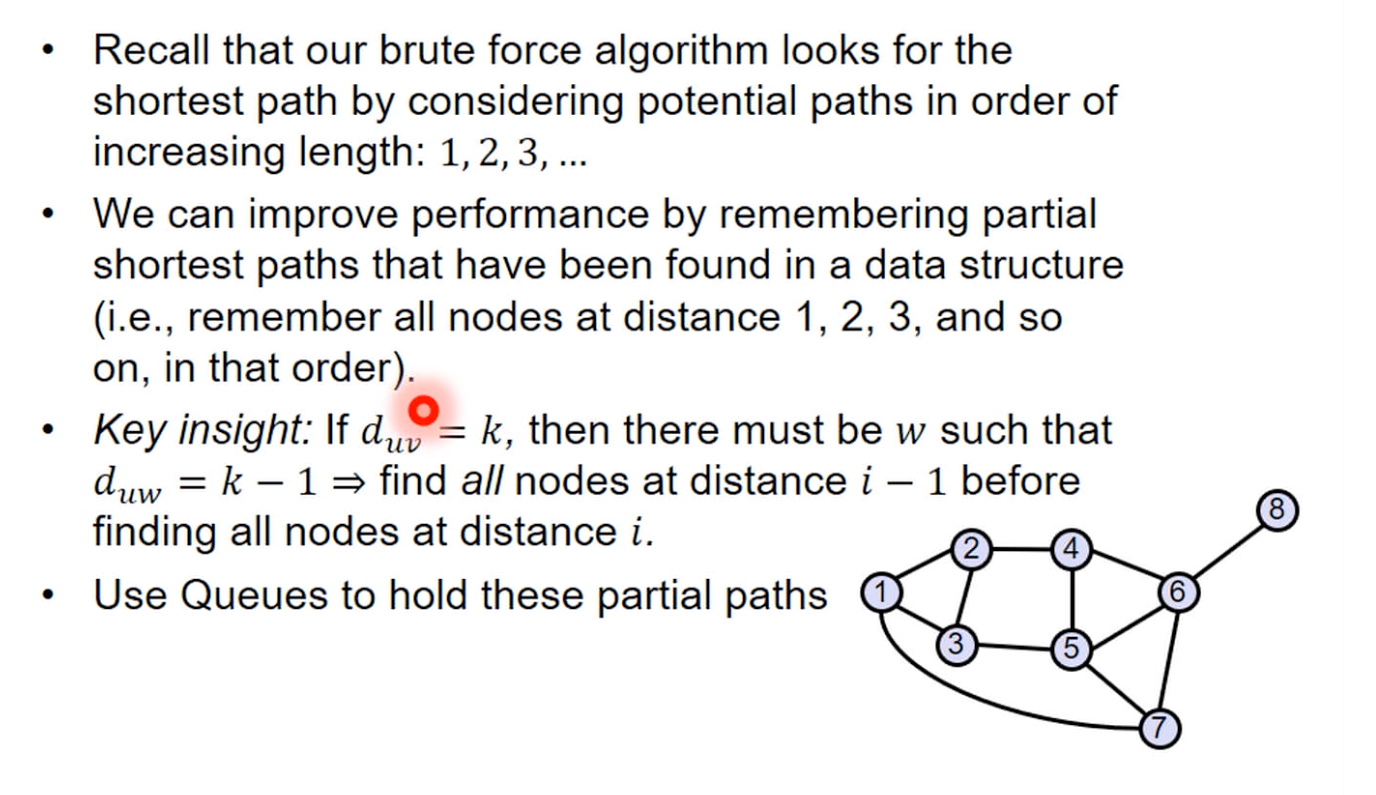

### Data Structures
- Data sturucture: a policy for organizing data in computer memory with the goal of supporting a specific set of operations efficiently
- is the basis for implementing an abstract data type (a class)
    - The ADT (Abstract Data Type) defines the logical form of the data
    - The data structure implements the physical form
        - Ex: dicts, ists, adjacency matrix, adjacency list

## Queue ADT
- A queue is a dynamic set that supports inserts and deletes
- A delete operation (dequeue) removes the element that has been inthe set for the longest time
- Enforces first-in, first out (FIFO) policy

![Screenshot 2024-06-16 at 2.22.57 PM.png](<attachment:Screenshot 2024-06-16 at 2.22.57 PM.png>)

## Queue Data Structure
- Queues can be implemented in a number of ways
- When done efficiently, enqeue, dequeue, and empty all run in CONSTANT TIME
- It is important to use efficient structures to hold data to help make our algos mroe efficient


These queues will be used to help save the partial path-lengths when solving the SWP
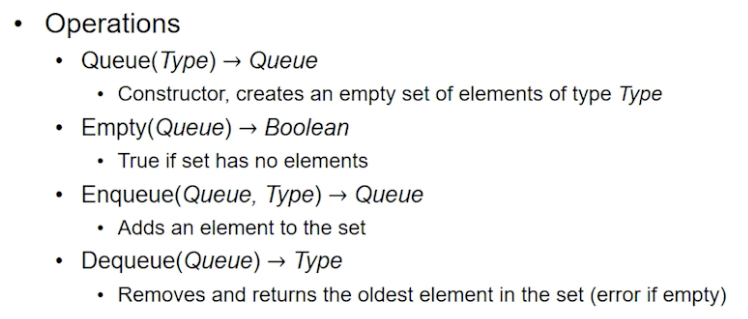

# Breadth-First Search (SWP P2)

- Graph Exploration : visit ALL nodes and edges of a graph (done to compute properties / applications in web, social networks, routing, games)
- BFS is a method to systematically eplore the nodes of a graph starting froma  designated source node s
    - Visit s and its neighbors 
    - For each neighbor, visit its neighbors, and so on until no more nodes can be visitied
- A graph is explored level by level (starting at level 0: {s})
- Think of it like a "ripple in a pond"

How do we make sure that all the nighbors of a node are visited before an THEIR neigbors are checked?
- ANS: Use a queue to store the nodes pending exploration
- ALl nodes at level i appear earlier in the queue than any node at level i+1
    - Depth-first search


Certainly! Let's implement the Breadth-First Search (BFS) algorithm in Python. This algorithm is used to find the shortest path in an unweighted graph from a given source vertex \( s \) to all other vertices. Here's the Python implementation with comments and an explanation:

```python
from collections import deque

def bfs(graph, s):
    """
    Performs the BFS algorithm to find the shortest path distances from source s to all vertices in the graph.
    
    :param graph: A dictionary representing an undirected graph where keys are vertices and values are lists of adjacent vertices.
    :param s: The source vertex.
    :return: A dictionary containing the shortest path distance from the source to each vertex.
    """
    # Initialize the queue for BFS
    Q = deque()
    
    # Initialize the distance dictionary with infinity for all vertices
    d = {u: float('inf') for u in graph}
    
    # Distance to the source is 0
    d[s] = 0
    
    # Enqueue the source vertex
    Q.append(s)
    
    # Continue until the queue is empty
    while Q:
        # Dequeue a vertex from the front of the queue
        u = Q.popleft()
        
        # Iterate over all neighbors of the dequeued vertex
        for v in graph[u]:
            # If the neighbor has not been visited (distance is still infinity)
            if d[v] == float('inf'):
                # Update the distance to this neighbor
                d[v] = d[u] + 1
                # Enqueue the neighbor
                Q.append(v)
    
    return d

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

s = 'A'

# Perform BFS and print the shortest path distances from the source
distances = bfs(graph, s)
print(distances)
```

### Explanation:
1. **Initialization**:
   - The queue `Q` is initialized using `deque` for efficient FIFO operations.
   - The distance dictionary `d` is initialized with all vertices set to infinity (`float('inf')`), indicating that they are initially unreachable.
   - The distance to the source vertex `s` is set to 0.

2. **Enqueue the Source Vertex**:
   - The source vertex `s` is enqueued to start the BFS process.

3. **BFS Loop**:
   - The while loop continues until the queue is empty.
   - In each iteration, a vertex `u` is dequeued from the front of the queue.
   - For each neighbor `v` of the dequeued vertex `u`, the algorithm checks if `v` has been visited (i.e., if its distance is still infinity).
   - If `v` has not been visited, its distance is updated to `d[u] + 1`, and `v` is enqueued.

4. **Return the Distances**:
   - The function returns the distance dictionary `d`, which contains the shortest path distances from the source `s` to all other vertices.

### Example:
Given the example graph, the BFS algorithm starts at vertex `A` and explores all vertices at the present depth level before moving on to vertices at the next depth level. The output distances dictionary shows the shortest path distances from `A` to all other vertices.

Output for the provided graph:
```
{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}
```

This output indicates that:
- The distance from `A` to itself is 0.
- The distance from `A` to `B` and `C` is 1.
- The distance from `A` to `D`, `E`, and `F` is 2.

# Overview of modeule 

1. **Problem-Solving Approach**: 
   - We started with a big problem and realized that a brute force method was not effective.
   - To improve our approach, we considered using standard searching algorithms.

2. **Breadth-First Search (BFS)**:
   - BFS was identified as an ideal candidate for our problem due to its widespread applicability and standard implementation.
   - BFS helps us find the shortest path in an unweighted graph.

3. **Data Storage Using Queues**:
   - To implement BFS effectively, we needed a way to store and manage our data.
   - We identified a queue as the perfect data structure for this purpose because of its properties and efficiency.

4. **Future Learning**:
   - Throughout the course, we will explore various data structures and their efficiencies.
   - We will also study different algorithms, particularly searching algorithms, to understand their properties.
   - This knowledge will help us solve problems more efficiently by selecting the right tools and techniques for our code.

In summary, we transitioned from an inefficient brute force approach to leveraging BFS and queues, and we'll continue to build on this foundation with further studies in data structures and algorithms to enhance our problem-solving toolkit.